<a href="https://colab.research.google.com/github/Hariom-Gupta/program/blob/master/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas_datareader as web
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')



In [3]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


In [4]:
df.shape

(2003, 6)

<function matplotlib.pyplot.show>

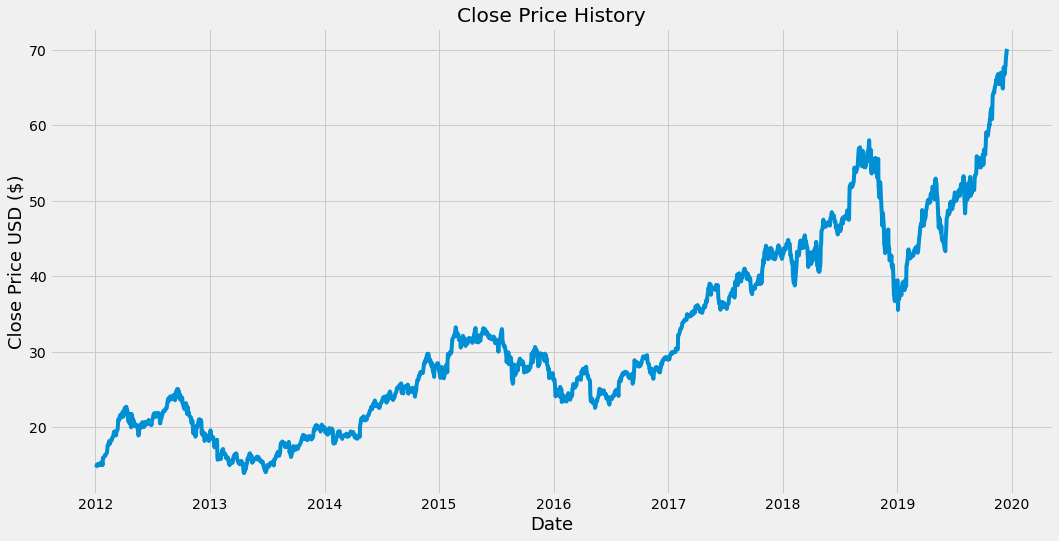

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [6]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)

training_data_len 

1603

In [7]:
#Scale the data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 35s 21ms/step - loss: 0.0025


In [19]:
test_data = scaled_data[training_data_len - 60: , :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])


In [20]:
x_test = np.array(x_test)

In [21]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [23]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

0.22946535110473631

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


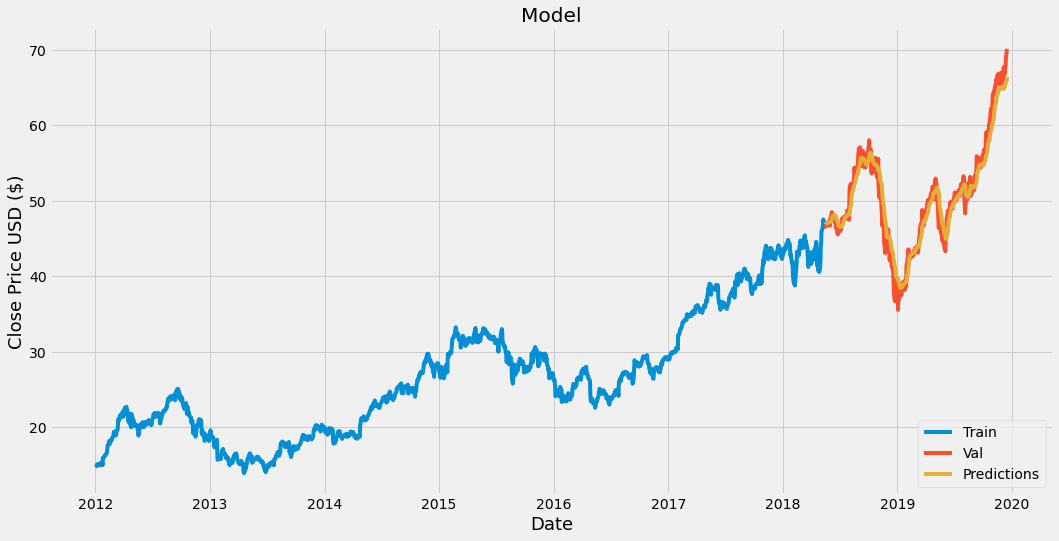

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
#show the valud and predicted prices 
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.859215
2018-05-18,46.577499,46.954166
2018-05-21,46.907501,46.985626
2018-05-22,46.790001,47.017296
2018-05-23,47.090000,47.032001
...,...,...
2019-12-11,67.692497,65.301414
2019-12-12,67.864998,65.496780
2019-12-13,68.787498,65.708649


In [31]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#create a new dataframe
new_def = apple_quote.filter(['Close'])
last_60_days = new_def[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#create an emplty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the x_test data set toan numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
#undo the scaling 
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)


[[66.85177]]


In [37]:
apple_quote2 = web.DataReader('ITC', data_source='yahoo', start='2021-03-26', end='2021-03-26')
print(apple_quote2['Close'])

Date
2021-03-26    2.9
Name: Close, dtype: float64


In [44]:
#GOOGLEFINANCE("GOOG", "price")
google_quote = web.DataReader('ITC', data_source='yahoo', start='2021-03-24', end='2021-03-26')
print(google_quote['Close'])

Date
2021-03-24    30.400000
2021-03-25    30.299999
2021-03-26     2.900000
Name: Close, dtype: float64


In [8]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 3, 27)

f = web.DataReader("AAPL", 'yahoo', start, end)
print(f['Close'])

Date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2021-03-22    123.389999
2021-03-23    122.540001
2021-03-24    120.089996
2021-03-25    120.589996
2021-03-26    121.209999
Name: Close, Length: 311, dtype: float64


In [10]:
#!pip install nsepy

from nsepy import get_history
from datetime import date
data = get_history(symbol="SBIN", start=date(2020,1,1), end=date(2020,1,31))
data[['Close']].plot()

KeyboardInterrupt: ignored

In [13]:
from datetime import date
from nsepy import get_history
# Stock futures (Similarly for index futures, set index = True)
stock_fut = get_history(symbol="SBIN",
                        start=date(2020,1,1),
                        end=date(2020,1,10),
                        futures=True,
                        expiry_date=date(2020,1,29))

KeyboardInterrupt: ignored